### USING TENSORFLOW

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
DATA_PATH =r"C:\Users\SHIHANA\Downloads\Classification\Classification\JPEGImages"
TRAIN_FILE = r"C:\Users\SHIHANA\Downloads\Classification\Classification\NNEW_trainval_0.txt"
TEST_FILE = r"C:\Users\SHIHANA\Downloads\Classification\Classification\NNEW_test_0.txt"

In [3]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 4

In [12]:
def read_image_list(file_path):
    images = []
    labels = []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                images.append(parts[0])
                labels.append(int(parts[1]))
    return images, labels

In [13]:
train_images, train_labels = read_image_list(TRAIN_FILE)
test_images, test_labels = read_image_list(TEST_FILE)

In [14]:
class_names = {i: f"Class_{i}" for i in range(NUM_CLASSES)}

In [15]:
def custom_data_generator(images, labels, batch_size):
    num_samples = len(images)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_images = []
            batch_labels = []
            for i in range(offset, min(offset + batch_size, num_samples)):
                img = tf.keras.preprocessing.image.load_img(os.path.join(DATA_PATH, images[i]), target_size=IMG_SIZE)
                img = tf.keras.preprocessing.image.img_to_array(img)
                img = img / 255.0  # Normalize
                batch_images.append(img)
                batch_labels.append(labels[i])
            yield np.array(batch_images), tf.keras.utils.to_categorical(batch_labels, NUM_CLASSES)

In [16]:
train_generator = custom_data_generator(train_images, train_labels, BATCH_SIZE)
validation_generator = custom_data_generator(test_images, test_labels, BATCH_SIZE)

In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

C:\Users\SHIHANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(test_images) // BATCH_SIZE
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 190s 5s/step - accuracy: 0.7580 - loss: 8.2803 - val_accuracy: 0.4410 - val_loss: 1.3156
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.5309 - loss: 2.0888 - val_accuracy: 0.4885 - val_loss: 1.3259
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 171s 5s/step - accuracy: 0.2015 - loss: 1.4532 - val_accuracy: 0.4654 - val_loss: 1.2577
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.2182 - loss: 1.5309 - val_accuracy: 0.3654 - val_loss: 1.8132
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.3495 - loss: 1.8518 - val_accuracy: 0.3654 - val_loss: 1.4467
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.3015 - loss: 1.6615 - val_accuracy: 0.3654 - val_loss: 1.3128
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.2039 - loss: 1.6972 - val_accuracy: 0.3923 - val_loss: 10.4036
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 161s 5s/step - accuracy: 0.3173 - loss: 5.8645 - val_accuracy: 0.4885 - 

In [20]:
model.save('acne_model.h5')

In [21]:
def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0

In [22]:
def predict_acne(img_path):
    preprocessed_img = preprocess_image(img_path)
    prediction = model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    return class_names[predicted_class], confidence

In [23]:
def display_result(img_path, predicted_class, confidence):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}")
    plt.show()

In [24]:
def acne_classification_pipeline(img_path):
    predicted_class, confidence = predict_acne(img_path)
    display_result(img_path, predicted_class, confidence)
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step


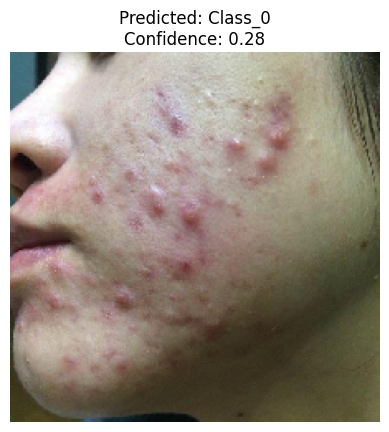

Predicted Class: Class_0
Confidence: 0.28


In [25]:
user_image_path = os.path.join(DATA_PATH, "levle3_21.jpg") 
acne_classification_pipeline(user_image_path)

### USING PYTORCH

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
DATA_PATH =r"C:\Users\SHIHANA\Downloads\Classification\Classification\JPEGImages"
TRAIN_FILE = r"C:\Users\SHIHANA\Downloads\Classification\Classification\NNEW_trainval_0.txt"
TEST_FILE = r"C:\Users\SHIHANA\Downloads\Classification\Classification\NNEW_test_0.txt"

In [3]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 4

In [4]:
def read_image_list(file_path):
    images = []
    labels = []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                images.append(parts[0])
                labels.append(int(parts[1]))
    return images, labels

In [5]:
train_images, train_labels = read_image_list(TRAIN_FILE)
test_images, test_labels = read_image_list(TEST_FILE)
class_names = {i: f"Class_{i}" for i in range(NUM_CLASSES)}

In [6]:
class AcneDataset(Dataset):
    def __init__(self, images, labels, root_dir, transform=None):
        self.images = images
        self.labels = labels
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.images[idx])
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

In [7]:
transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [8]:
train_dataset = AcneDataset(train_images, train_labels, DATA_PATH, transform)
test_dataset = AcneDataset(test_images, test_labels, DATA_PATH, transform)

In [9]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [10]:
class AcneNet(nn.Module):
    def __init__(self, num_classes):
        super(AcneNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 28 * 28, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AcneNet(NUM_CLASSES).to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [13]:
for epoch in range(EPOCHS):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    print(f'Epoch {epoch+1}/{EPOCHS}, Test Accuracy: {100 * correct / total:.2f}%')

Epoch 1/10, Test Accuracy: 38.70%
Epoch 2/10, Test Accuracy: 48.29%
Epoch 3/10, Test Accuracy: 50.34%
Epoch 4/10, Test Accuracy: 48.29%
Epoch 5/10, Test Accuracy: 47.26%
Epoch 6/10, Test Accuracy: 50.00%
Epoch 7/10, Test Accuracy: 50.34%
Epoch 8/10, Test Accuracy: 51.71%
Epoch 9/10, Test Accuracy: 50.68%
Epoch 10/10, Test Accuracy: 48.97%


In [14]:
def preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img = transform(img).unsqueeze(0)
    return img

In [15]:
def predict_acne(img_path):
    model.eval()
    with torch.no_grad():
        img = preprocess_image(img_path).to(device)
        output = model(img)
        _, predicted = torch.max(output, 1)
        probabilities = torch.nn.functional.softmax(output, dim=1)
        confidence = probabilities[0][predicted].item()
    return class_names[predicted.item()], confidence

In [16]:
def display_result(img_path, predicted_class, confidence):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}")
    plt.show()

In [17]:
def acne_classification_pipeline(img_path):
    predicted_class, confidence = predict_acne(img_path)
    display_result(img_path, predicted_class, confidence)
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")

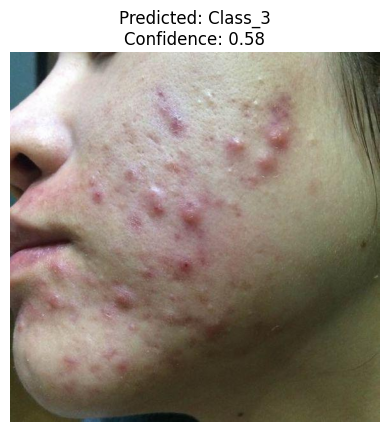

Predicted Class: Class_3
Confidence: 0.58


In [18]:
user_image_path = os.path.join(DATA_PATH, "levle3_21.jpg")
acne_classification_pipeline(user_image_path)

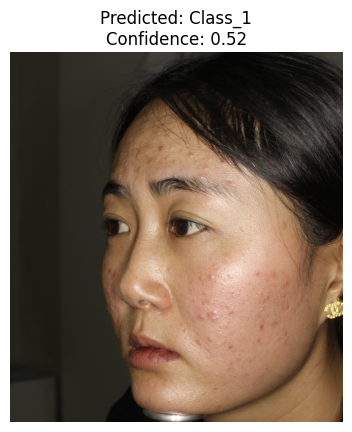

Predicted Class: Class_1
Confidence: 0.52


In [19]:
user_image_path = os.path.join(DATA_PATH, "levle2_105.jpg")
acne_classification_pipeline(user_image_path)

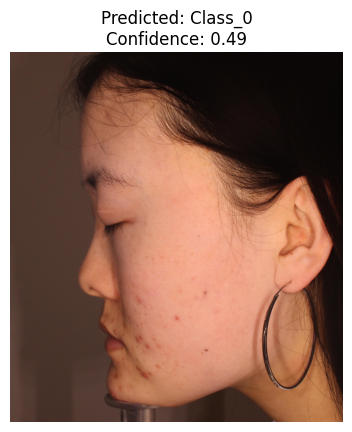

Predicted Class: Class_0
Confidence: 0.49


In [20]:
user_image_path = os.path.join(DATA_PATH, "levle1_126.jpg")
acne_classification_pipeline(user_image_path)

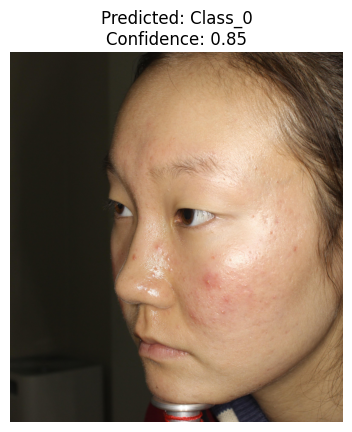

Predicted Class: Class_0
Confidence: 0.85


In [21]:
user_image_path = os.path.join(DATA_PATH, "levle0_251.jpg")
acne_classification_pipeline(user_image_path)

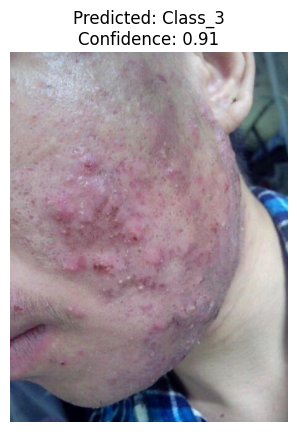

Predicted Class: Class_3
Confidence: 0.91


In [22]:
user_image_path = os.path.join(DATA_PATH, "levle3_105.jpg")
acne_classification_pipeline(user_image_path)